In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import scipy.stats as sp
import matplotlib as mtp
#import PQ3_preprocessing as PQ3

In [2]:
mtp.rcParams['pdf.fonttype'] = 42

# COLOR CODE

In [3]:
CMAP_GRAY = [(0.8,0.8,0.8),
             (0.1,0.1,0.1)] # The Gray and Black cmap
CMAP_WHITE = [(0.95,0.95,0.95),
             (0.6,0.6,0.6)]
CMAP_WHITE_R = [(0.6,0.6,0.6),
               (0.95,0.95,0.95)]

# DIRECTORY

In [4]:
figDir = "/cellar/users/a53206221/Data/PQ3RO1/fig/update.7.6.2020/"

# Load Data

In [5]:
SCNADf = pd.read_csv("/cellar/users/a53206221/Data/PQ3RO1/SCNADf_v3.tsv",sep = '\t')
SCNADf.drop("Unnamed: 0",axis = 1,inplace=True)
CYT = pd.read_csv("/cellar/users/a53206221/Data/PQ3RO1/CYT.csv")
tcgaDf = pd.read_csv("/cellar/users/a53206221/Data/Expression/TCGA_TP_allgene.csv")

# Figure S1 mutation

In [6]:
"The msi data"
msiScoreTable = pd.read_excel('/cellar/users/a53206221/Data/Expression/Downloads\ds_PO.17.00073-1.xlsx',sep='\t')
msiScoreTable = msiScoreTable[msiScoreTable['Case ID'].str.contains('TCGA')]
msiScoreTable = msiScoreTable[['Case ID','MANTIS Score','Cancer Type']]
msiScoreTable.rename(columns = {'Case ID':'patient_id', 'Cancer Type':'disease'},inplace =True)
msiScoreTable.patient_id = [ x[-4:] for x in msiScoreTable.patient_id.tolist()]
msiScoreTable.disease = [ x.split('-')[1] for x in msiScoreTable.disease.tolist()]
msiScoreTable['msi'] = pd.cut(msiScoreTable['MANTIS Score'],[0,0.4,np.inf],labels = ['MSS','MSI-H'])

In [7]:
"All Mutation data"
AllMaf = pd.read_csv("/cellar/users/a53206221/Data/mutation_file/all.maf",sep='\t',header=None)
AllMaf.columns = ['patient_id','gene','type','category','chromosome','start','end','allel1','allel2','mutation','category_','unk','protein','disease','content']

AllMafNmutNonsilent = pd.DataFrame({'numMut':AllMaf[AllMaf.category !='Silent'].patient_id.value_counts()})
AllMafNmutNonsilent.index.name = 'patient_id'
AllMafNmutNonsilent.reset_index(inplace = True)
AllMafNmutNonsilent.patient_id = [ x[-4:] for x in AllMafNmutNonsilent.patient_id.tolist()]
AllMafNmutNonsilent = pd.merge(AllMafNmutNonsilent,msiScoreTable, on = 'patient_id')
AllMafNmutNonsilent = pd.merge(AllMafNmutNonsilent,SCNADf, on = 'patient_id')

In [8]:
AllMafNmutNonsilent = pd.DataFrame({'numMut':AllMaf[AllMaf.category !='Silent'].patient_id.value_counts()})
AllMafNmutNonsilent.index.name = 'patient_id'
AllMafNmutNonsilent.reset_index(inplace = True)
AllMafNmutNonsilent.patient_id = [ x[-4:] for x in AllMafNmutNonsilent.patient_id.tolist()]
AllMafNmutNonsilent = pd.merge(AllMafNmutNonsilent,msiScoreTable, on = 'patient_id')
AllMafNmutNonsilent = pd.merge(AllMafNmutNonsilent,SCNADf, on = 'patient_id').drop_duplicates()

Text(0,0.5,'Non-silent mutation')

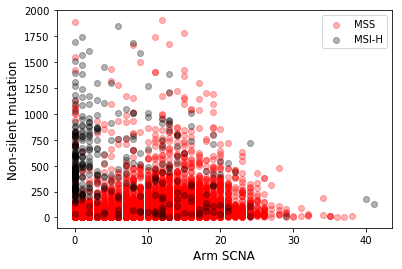

In [9]:
"Figure S1A"
plt.scatter(y = AllMafNmutNonsilent[AllMafNmutNonsilent.msi == 'MSS'].numMut, x = AllMafNmutNonsilent[AllMafNmutNonsilent.msi == 'MSS'].arm,alpha = 0.3,color = 'r',label = 'MSS')
plt.scatter(y = AllMafNmutNonsilent[AllMafNmutNonsilent.msi == 'MSI-H'].numMut, x = AllMafNmutNonsilent[AllMafNmutNonsilent.msi == 'MSI-H'].arm,alpha = 0.3,color = 'k',label = 'MSI-H')
plt.xlabel('Arm SCNA',fontsize = 12)
plt.legend()
plt.ylim([-100,2000])
plt.ylabel('Non-silent mutation',fontsize = 12)
#plt.savefig(figDir + "Fig.S1A.pdf",bbox_inches='tight')

Text(0,0.5,'Non-silent mutation')

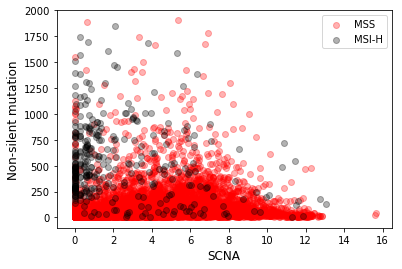

In [10]:
"Figure S1B"
plt.scatter(y = AllMafNmutNonsilent[AllMafNmutNonsilent.msi == 'MSS'].numMut, x = AllMafNmutNonsilent[AllMafNmutNonsilent.msi == 'MSS'].SCNA,alpha = 0.3,color = 'r',label = 'MSS')
plt.scatter(y = AllMafNmutNonsilent[AllMafNmutNonsilent.msi == 'MSI-H'].numMut, x = AllMafNmutNonsilent[AllMafNmutNonsilent.msi == 'MSI-H'].SCNA,alpha = 0.3,color = 'k',label = 'MSI-H')
plt.xlabel('SCNA',fontsize = 12)
plt.legend()
plt.ylim([-100,2000])
plt.ylabel('Non-silent mutation',fontsize = 12)
#plt.savefig(figDir + "Fig.S1B.pdf",bbox_inches='tight')

In [11]:
print sp.spearmanr(AllMafNmutNonsilent[AllMafNmutNonsilent.msi == 'MSS'].numMut,AllMafNmutNonsilent[AllMafNmutNonsilent.msi == 'MSS'].SCNA)

SpearmanrResult(correlation=0.3313627867548411, pvalue=7.524597169665471e-218)


In [12]:
print sp.spearmanr(AllMafNmutNonsilent[AllMafNmutNonsilent.msi == 'MSI-H'].numMut,AllMafNmutNonsilent[AllMafNmutNonsilent.msi == 'MSI-H'].SCNA)

SpearmanrResult(correlation=-0.19402144578906375, pvalue=0.00016292756128456342)


# Figure S2 p53

In [13]:
P53_10_repressed_target = ['CCNB1','PLK1','EED','CDK1','EZH2','CCNB2','E2F3','MYBL2','FOXM1','E2F2']
with open("/cellar/users/a53206221/Data/PQ3RO1/P53ac10DownRegGene.txt","w") as f:
    for line in P53_10_repressed_target:
        f.write(line + '\n')

In [14]:
P53score = pd.read_csv("/cellar/users/a53206221/Data/PQ3RO1/P53acScore.tsv",sep='\t')

Text(0.5,1,'Spearman correlation between P53 activity and SCNA')

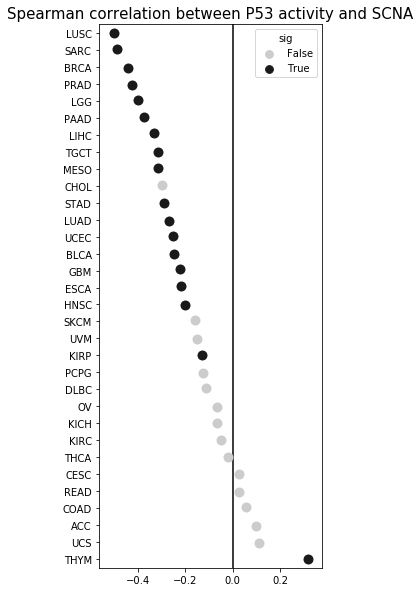

In [15]:
from statsmodels.stats.multitest import multipletests

"Figure S2.A"
spearmanList = []
pValList = []

tmp = pd.merge(P53score, SCNADf, on = "patient_id")
tmp = pd.merge(tcgaDf[["patient_id","disease"]], tmp, on = "patient_id").drop_duplicates()
for disease in tmp.disease.unique().tolist():
    t = tmp[tmp.disease == disease]
    t = sp.spearmanr(t.p53acScore,t.SCNA)
    spearmanList.append(t[0])
    pValList.append(t[1])
    
dfplot = pd.DataFrame({'spearman':spearmanList,
                       'sig':multipletests(pValList,method = 'fdr_bh')[0],
                       'disease':tmp.disease.unique().tolist()})

plt.figure(figsize = (4,10))
g = sns.stripplot(x = 'spearman', y = 'disease',hue = 'sig', data = dfplot.sort_values(by = 'spearman'), 
                  size =10, palette = CMAP_GRAY)
plt.axvline(x = 0,color = 'k')
plt.ylabel('')
plt.xlabel('')
plt.title('Spearman correlation between P53 activity and SCNA',fontsize =15)
#plt.savefig(figDir + "Fig.S2.B.pdf", bbox_inches = "tight")

In [16]:
dic_mut = {}
files = glob.glob('/cellar/users/a53206221/Data/mutation_file/analyses__2016_01_28/*/transformed.cor.cli.txt')
for f in files:
    disease = f.split('org_')[1].split('-')[0]
    dic_mut[disease] = pd.read_csv(f,sep='\t')
    
# Collecting mutation data done, start merging with SCNA data
diseaseList = tcgaDf.disease.unique().tolist()
df_mg_SCNA_TP53 = pd.DataFrame(columns = ['patient_id','SCNA','disease','TP53 mutation analysis'])
for disease in diseaseList:
    try: 
        #dic_mut[disease]
        if 'TP53 mutation analysis' in dic_mut[disease].Name.tolist():
            tmp = dic_mut[disease].copy()
            tmp.columns = ['Name']+[x.split('-')[2] for x in  tmp.columns.tolist()[1:]]
            tmp_MG = pd.merge(tmp.set_index('Name').loc[['TP53 mutation analysis']].T.reset_index().rename(columns = {'index':'patient_id'}),
                    SCNADf[['patient_id','SCNA']])
            tmp_MG['disease'] = [disease]*len(tmp_MG)
            df_mg_SCNA_TP53 = pd.concat([df_mg_SCNA_TP53,tmp_MG])
        else:
            continue
    except KeyError:
        continue

/cellar/users/a53206221/anaconda3/envs/py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [17]:
ranksum_list = []
pval_list = []
disease_list = []
for disease in df_mg_SCNA_TP53.disease.unique().tolist():
    tmp = df_mg_SCNA_TP53[df_mg_SCNA_TP53.disease == disease]
    Mut = tmp[tmp['TP53 mutation analysis'] == 'TP53 mutated']
    Wild = tmp[tmp['TP53 mutation analysis'] == 'TP53 wild-type']
    ranksum_list.append(sp.ranksums(Mut['SCNA'],Wild['SCNA'])[0])
    pval_list.append(sp.ranksums(Mut['SCNA'],Wild['SCNA'])[1])
    disease_list.append(disease)
    
df_ranksum = pd.DataFrame(data = ranksum_list,index = disease_list, columns = ['ranksum test'])
df_ranksum['pval'] = pval_list
df_ranksum.dropna(subset = ["pval"],inplace = True)

from statsmodels.stats import multitest
df_ranksum['adj-pval'] = multitest.multipletests(df_ranksum['pval'],method = 'fdr_bh')[1]

df_ranksum['disease_index'] = df_ranksum.index.tolist()
for disease in df_ranksum.index.tolist():
    if df_ranksum.loc[disease]['adj-pval'] <0.05:
        df_ranksum.loc[disease,['disease_index']] = '* ' + df_ranksum.loc[disease]['disease_index'] 

/cellar/users/a53206221/anaconda3/envs/py2.7/lib/python2.7/site-packages/scipy/stats/stats.py:5061: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


Text(0,0.5,'SCNA')

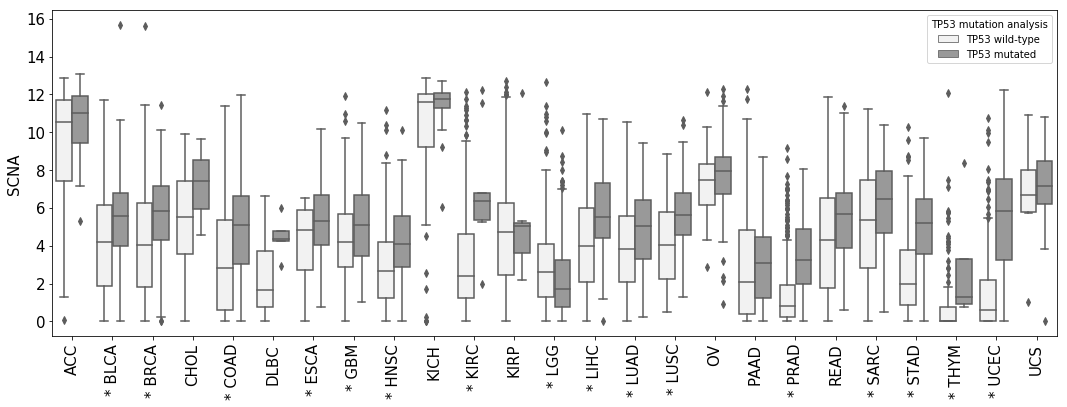

In [18]:
"Figure S2.A"
plt.figure(figsize = (18,6))
#g.axes.set_ylabel('SCNA')
mtp.rc('xtick',labelsize = 15)
mtp.rc('ytick',labelsize = 15)
order = sorted(df_ranksum.index.tolist())
g = sns.boxplot(x = 'disease', y = 'SCNA', 
                hue = 'TP53 mutation analysis', 
                palette = CMAP_WHITE,
                order = order,
                data =  df_mg_SCNA_TP53)
g.axes.set_xticklabels(df_ranksum.loc[order].disease_index.tolist(),rotation = 90)
g.axes.set_xlabel('')
g.axes.set_ylabel('SCNA',fontsize = 15)
#plt.savefig(figDir + "Fig.S2.A.pdf", bbox_inches = "tight")

# Figure S3

In [19]:
"Figure S3.A"
SCNADf[["focal","arm","chr","SCNA"]].corr(method = "spearman")

,focal,arm,chr,SCNA
focal,1.000000,0.626737,0.612231,0.735097
arm,0.626737,1.000000,0.547643,0.865567
chr,0.612231,0.547643,1.000000,0.860354
SCNA,0.735097,0.865567,0.860354,1.000000


In [20]:
dfplot = pd.merge(CYT,tcgaDf[["patient_id","disease"]], on = "patient_id")
dfplot = pd.merge(dfplot, SCNADf, on = "patient_id").drop_duplicates()

In [21]:
def plotCorrelation(dfplot,scna = "focal",saveFile = False, saveDir = None):
    diseaseList = dfplot.disease.unique().tolist()
    testList = []
    pvalList = []
    for disease in diseaseList:
        tmp = dfplot[dfplot.disease == disease]
        test = sp.spearmanr(tmp[scna],
                            tmp["CYT"])
        testList.append(test[0])
        pvalList.append(test[1])
        
    from statsmodels.stats.multitest import multipletests
    multTest = multipletests(pvals = pvalList,method = "fdr_bh")
    dftmp = pd.DataFrame({"spearmanr": testList,
                          "pval":pvalList,
                          "fdr":multTest[1],
                          "sig":multTest[0],
                          "disease":diseaseList})
    
    order = dftmp.sort_values(by = "spearmanr")["disease"].tolist()
    plt.figure(figsize =(3,9))
    sns.stripplot(x = "spearmanr", y = "disease", 
                  data = dftmp, order = order,
                  hue = "sig",
                  size = 10,
                  palette = CMAP_GRAY)
    plt.axvline(x = 0, color = 'k')
    plt.title(scna)
    if saveFile:
        plt.savefig(saveDir + scna + ".corr_CYT.pdf",bbox_inches = "tight" )

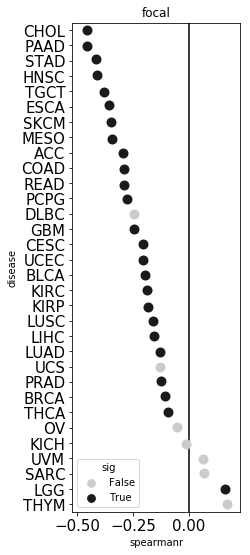

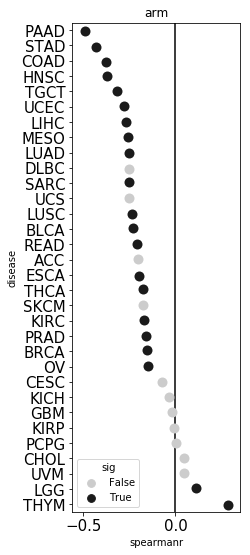

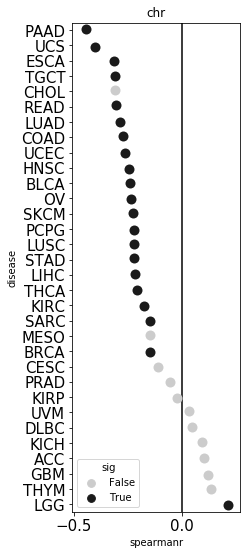

In [22]:
for scna in ["focal","arm","chr"]:
    plotCorrelation(dfplot,scna, False, figDir)

# Figure S4 the model comparison between SCNA events and heatmap

In [23]:
dfmodel = pd.merge(SCNADf,CYT, on = "patient_id")
dfmodel = pd.merge(dfmodel, tcgaDf[["patient_id","disease"]], on = "patient_id").drop_duplicates()

In [24]:
import statsmodels.formula.api as sm

In [25]:
dfmodel[["focal","arm","chr"]] = sp.stats.zscore(dfmodel[["focal","arm","chr"]])
model = sm.ols("CYT ~ focal + arm + chr + disease", data = dfmodel).fit()

In [26]:
data = pd.DataFrame({"coef":model.params.loc[["focal","arm","chr"]],
                     "pval":model.pvalues.loc[["focal","arm","chr"]]})

In [27]:
#data.to_csv("/cellar/users/a53206221/Data/PQ3RO1/Fig.S4B.csv")

In [28]:
data

,coef,pval
focal,-0.069847,1.646048e-09
arm,-0.198380,1.704078e-50
chr,-0.145147,2.760150e-30


In [29]:
parental_gene = ["EIF2AK3","EIF2S1","DDIT3","ERN1","XBP1","ATF6"]

In [30]:
corr_matrix = {}
dftmp = pd.merge(tcgaDf[["patient_id","disease"] + parental_gene], SCNADf , on = "patient_id")
diseaseList = dftmp.disease.unique().tolist()

dict_corrMatrix = {}
for gene in parental_gene:
    df_corr = pd.DataFrame(index = ["focal","arm","chr"], columns = diseaseList)
    for disease in diseaseList:
        tmp = dftmp[dftmp.disease == disease]
        df_corr[disease] = tmp[["focal","arm","chr", gene]].corr(method = "spearman").loc[gene].drop(gene)
    dict_corrMatrix[gene] = df_corr

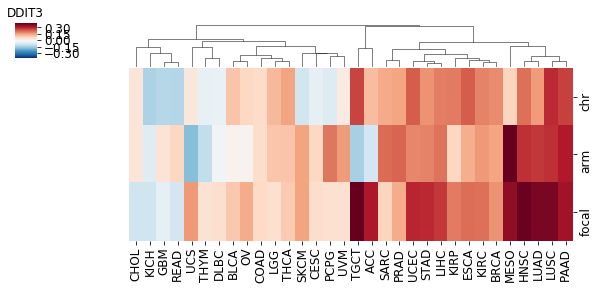

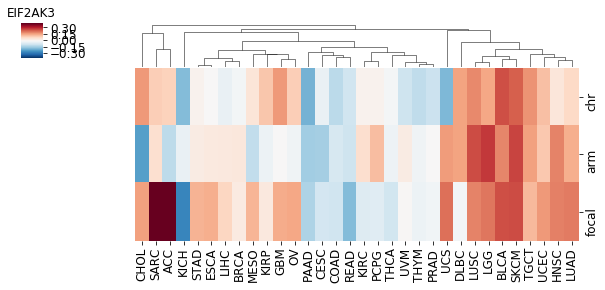

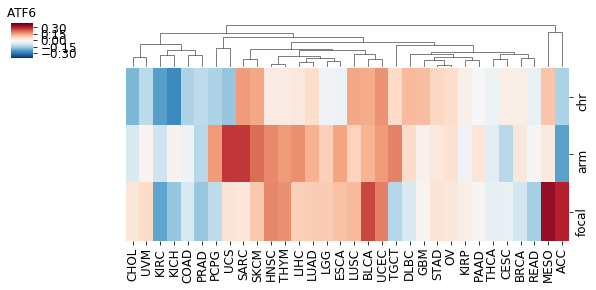

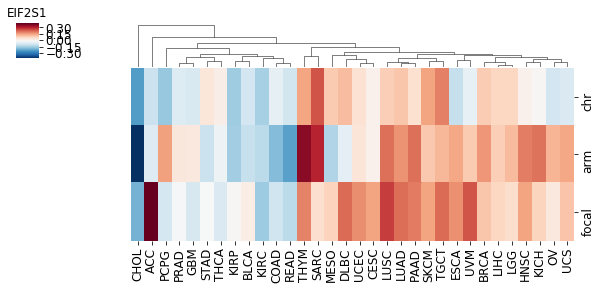

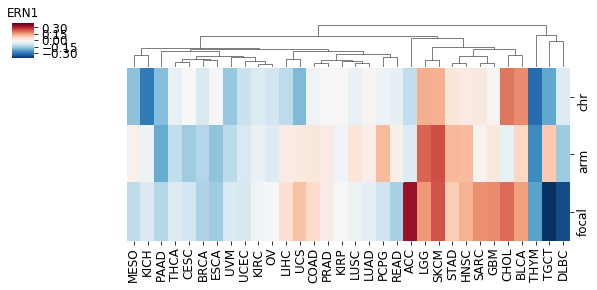

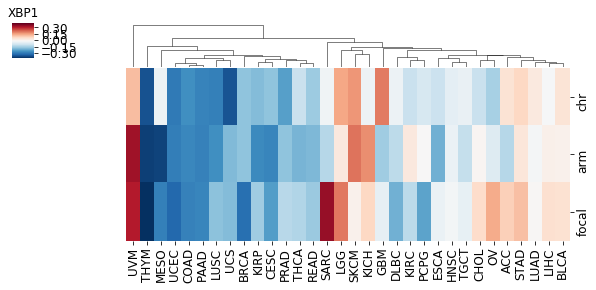

In [31]:
mtp.rc('xtick',labelsize = 12)
mtp.rc('ytick',labelsize = 12)
order = ["chr","arm","focal"]
for gene in dict_corrMatrix.keys():

    sns.clustermap(dict_corrMatrix[gene].loc[order],
                   center = 0,
                   cmap = "RdBu_r",
                   figsize = (10,4),
                   vmax = .4,
                   vmin = -.4,
                   row_cluster = False,
                   )
    plt.title(gene)
    #plt.savefig(figDir + "Fig.S4A." + gene + ".pdf")

# Figure S5 the sample size vs numbers of significant genes

In [32]:
# load the processed file from the main figure
dfplot = pd.read_csv("/cellar/users/a53206221/Data/PQ3RO1/plot.Fig.S5.csv")
dfplot.rename(columns = {"Unnamed: 0":"disease"},inplace = True)

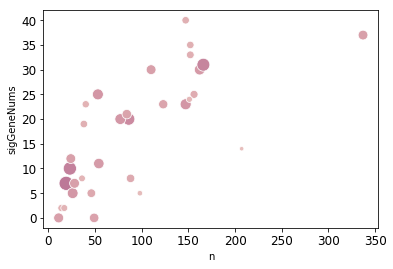

In [33]:
sns.scatterplot(x = "n", y = "sigGeneNums", 
                data = dfplot, size = "var",hue = "var",
                sizes=(20, 200), hue_norm=(0, 30), legend = False)
#plt.savefig("/cellar/users/a53206221/Data/PQ3RO1/fig/update.6.10.2020/Fig.Sx.pdf",bbox_inches = "tight")

# Figure S6

In [34]:
# get the upr gene set
Dir = "/cellar/users/a53206221/Data/REACTOME/"
import os

dict_f = {}
dict_gene = {}
files = os.listdir(Dir)
for f in files:
    if f != ".ipynb_checkpoints":
        dict_f[f] = pd.read_csv(Dir + f,sep = '\t')
        dict_gene[f.split("_")[0]] = [x.split()[1] for x in dict_f[f]["MoleculeName"]]

# remove duplicated genes and genes can't find in the TCGA datasets to avoid error
dict_gene["PERK"].remove("IL8")
dict_gene["PERK"].append("CXCL8")

dict_gene["XBP1S"].remove("ATPV0D1")
dict_gene["XBP1S"].append("ATP6V0D1")

dict_gene["XBP1S"].remove("C19orf10")
dict_gene["XBP1S"].append("MYDGF")

dict_gene["XBP1S"].remove("SRPR")
#dict_gene["XBP1S"].append("SPRPA")

dict_gene["IRE1alpha"].remove("SRPR")
#dict_gene["XBP1S"].append("SPRPA")

dict_gene["IRE1alpha"].remove("ATPV0D1")
dict_gene["IRE1alpha"].append("ATP6V0D1")

dict_gene["IRE1alpha"].remove("Xbp1")
dict_gene["IRE1alpha"].remove("Xbp1")
dict_gene["IRE1alpha"].append("XBP1")

dict_gene["IRE1alpha"].remove("C19orf10")
dict_gene["IRE1alpha"].append("MYDGF")

uprGene = []
for i in range(len(dict_gene.values())):
    uprGene.extend(dict_gene.values()[i])
    
uprGene = list(set(uprGene)) # remove duplicates

In [35]:
def diagonalHeatmap(disease, data, saveFig = False, saveDir = None):
    from scipy.cluster.hierarchy import linkage, dendrogram
    data = data[data.disease == disease]
    tmp_L = data[data['SCNA'] <= data['SCNA'].quantile(q = 0.3)]
    tmp_H = data[data['SCNA'] >= data['SCNA'].quantile(q = 0.7)]

    Z = linkage(tmp_L[list(set(uprGene))].corr(),"ward")
    fig = plt.figure()
    loc_index = dendrogram(Z,labels = tmp_L[list(set(uprGene))].corr().columns.tolist()).values()[0]
    plt.close(fig)

    #start to plot
    mask = np.zeros_like(tmp_L[loc_index].corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    plt.figure(figsize=(6,6))
    sns.heatmap(tmp_L[loc_index].corr(),
                mask = mask,
                   center = 0,
                   cmap = 'RdBu_r',
                   #annot = True,
                vmax  =1,
                vmin = -1,
                cbar = False)

    g = sns.heatmap(tmp_H[loc_index].corr(),
                mask = mask == False,
                   center = 0,
                   cmap = 'RdBu_r',
                   #annot = True,
                   cbar = False,
                vmax = 1,
                 vmin = -1,
                yticklabels = ' ',
                xticklabels = ' ',
                   )
    plt.title(disease)
    if saveFig:
        plt.savefig(saveDir + "Fig.S6." + tumor + ".pdf")

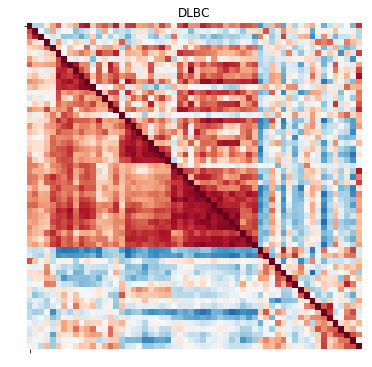

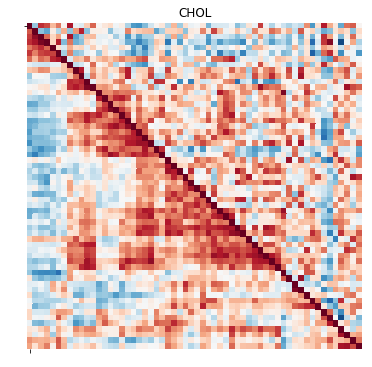

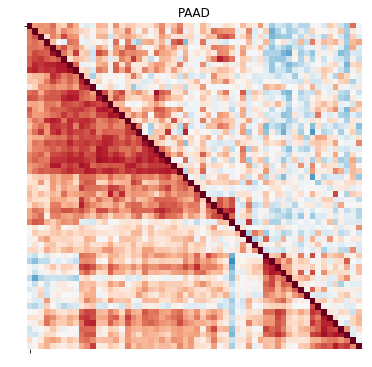

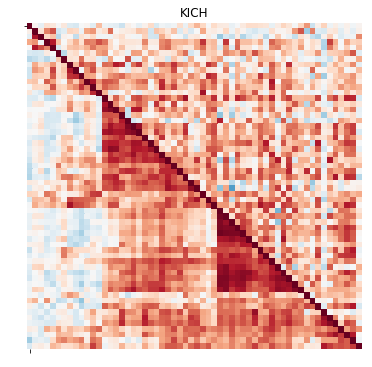

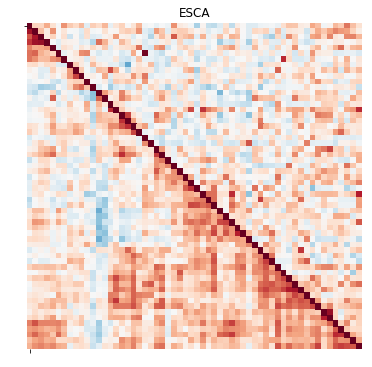

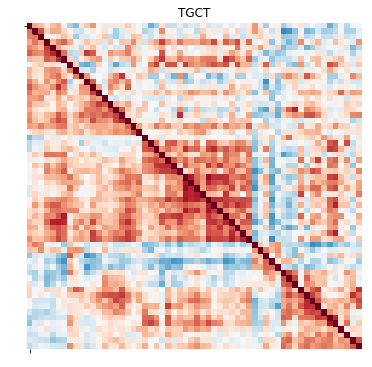

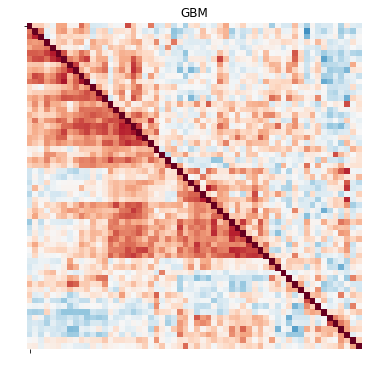

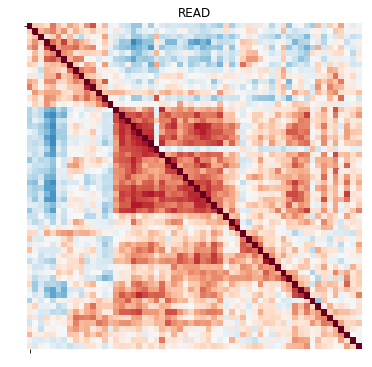

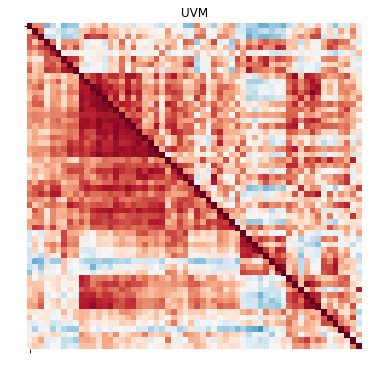

In [36]:
perturbed_tumor_types = ["DLBC","CHOL","PAAD","KICH","ESCA","TGCT","GBM","READ","UVM"]
dfplot = pd.merge(SCNADf[["patient_id","SCNA"]], tcgaDf[uprGene + ["patient_id","disease"]], on = "patient_id")

for tumor in perturbed_tumor_types:
    diagonalHeatmap(tumor, dfplot, False, figDir)

# Figure S7, survival plot from the protein data bank

In [37]:
gens = ["CXXC1","HSPA5","TPP1","SHC1","GSK3A","SERP1"]

# Figure S8 ATF4 and DDIT3 gene co-expression loss

In [38]:
dftmp = pd.merge(tcgaDf[["ATF4","DDIT3","patient_id","disease"]],SCNADf[["patient_id","SCNA"]], on = "patient_id")

In [39]:
figDir + disease + ".FigS9.pdf"

'/cellar/users/a53206221/Data/PQ3RO1/fig/update.7.6.2020/UVM.FigS9.pdf'

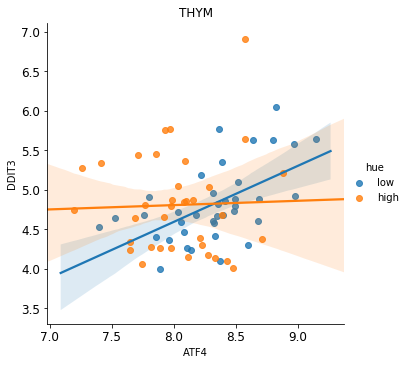

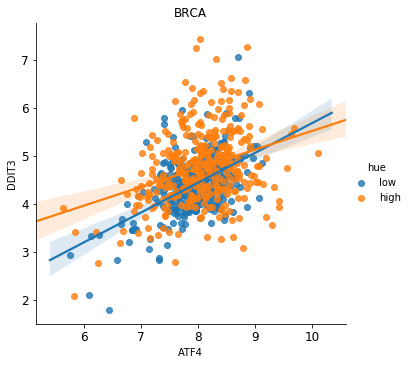

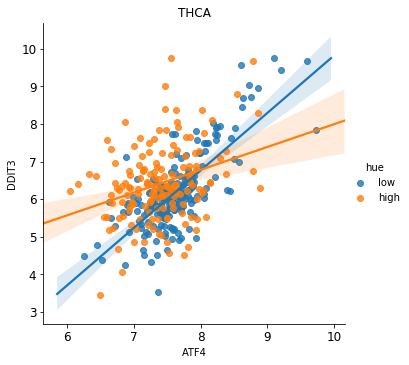

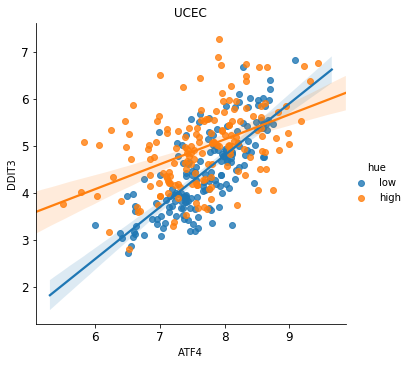

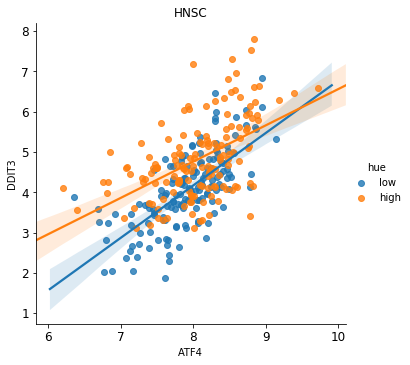

In [40]:
gene1, gene2 = "ATF4","DDIT3"
cases = ["THYM","BRCA","THCA","UCEC","HNSC"]
spearmanr_corr_l, spearmanr_corr_h = {}, {}
for disease in cases:
    
    tmp = dftmp[dftmp.disease == disease]
    l = tmp[tmp.SCNA <= tmp.SCNA.quantile(q = .3)]
    h = tmp[tmp.SCNA >= tmp.SCNA.quantile(q = .7)]
    dftmp_ = pd.DataFrame({gene1 : np.log2(1 + l[gene1]).tolist() + np.log2(1 + h[gene1]).tolist(),
                           gene2 : np.log2(1 + l[gene2]).tolist() + np.log2(1 + h[gene2]).tolist(),
                           "hue" : ["low"]* len(l) + ["high"] * len(h)})
    
    saveDir = figDir + disease + ".FigS9.pdf"
    sns.lmplot(x = gene1, y = gene2, data = dftmp_, hue = "hue")
    plt.title(disease)
    #plt.savefig(saveDir, bbox_inches = "tight")
    spearmanr_corr_l[disease] = sp.spearmanr(l[gene1],l[gene2])
    spearmanr_corr_h[disease] = sp.spearmanr(h[gene1], h[gene2])

In [41]:
for disease in cases:
    print(disease + "===>")
    print(spearmanr_corr_l[disease], spearmanr_corr_h[disease])

THYM===>
(SpearmanrResult(correlation=0.5625341941131415, pvalue=0.00023688470227589404), SpearmanrResult(correlation=-0.06048906048906049, pvalue=0.7260033022391518))
BRCA===>
(SpearmanrResult(correlation=0.4175584971001303, pvalue=1.1894646859037308e-15), SpearmanrResult(correlation=0.2677505386647135, pvalue=6.089547239207479e-07))
THCA===>
(SpearmanrResult(correlation=0.6587302875821238, pvalue=3.9234326109543866e-27), SpearmanrResult(correlation=0.2545937933034707, pvalue=0.0013893378364871359))
UCEC===>
(SpearmanrResult(correlation=0.7493870965626251, pvalue=3.564979455714937e-31), SpearmanrResult(correlation=0.45910682848510265, pvalue=5.566662887004652e-10))
HNSC===>
(SpearmanrResult(correlation=0.7126039680424278, pvalue=7.377746045514151e-25), SpearmanrResult(correlation=0.4958310267292696, pvalue=8.296013437526306e-11))


# Figure S9

In [42]:
RIDD_Alltargets = ['ANGPTL3','CD59','BLOC1S1','HSPA5','CES1','COL6A1','CYP1A2','CYP2E1','ERGIC3','GALNT2','GAS2','GEMIN5',
                  'GPC3','GYLTL1B','HGSNAT','INS','ERN1','ITGB2','MKRN2','PDGFRB','PDIA4','PDK2','PEPD','PER1','PPP2R1A','PMP22',
                  'PRKCD','RTN4','RUVBL1','SCARA3','SPARC','SUMO1','TAPBP']

In [43]:
def CreateColorMap(colormap):
    zipList = []
    tmpGeneList = set(dict_gene["PERK"] + dict_gene["ATF6"] + dict_gene["XBP1S"] + RIDD_Alltargets)
    for gene in tmpGeneList:
        if gene == "XBP1" or gene == "DDIT3":
            zipList.append(colormap[3]) # overlapping genes
        elif gene in dict_gene["XBP1S"]:
            zipList.append(colormap[0])
        elif gene in dict_gene["PERK"]:
            zipList.append(colormap[2])
        elif gene in dict_gene["ATF6"]:
            zipList.append(colormap[1])
        elif gene in RIDD_Alltargets:
            zipList.append(colormap[4])
    return dict(zip(tmpGeneList,zipList))

In [44]:
r_color = CreateColorMap(sns.color_palette("Set2")[:5])

In [45]:
dfplot = pd.read_csv("/cellar/users/a53206221/Data/PQ3RO1/fig/update.6.10.2020/Lasso.gene.matrix.csv",index_col=0)

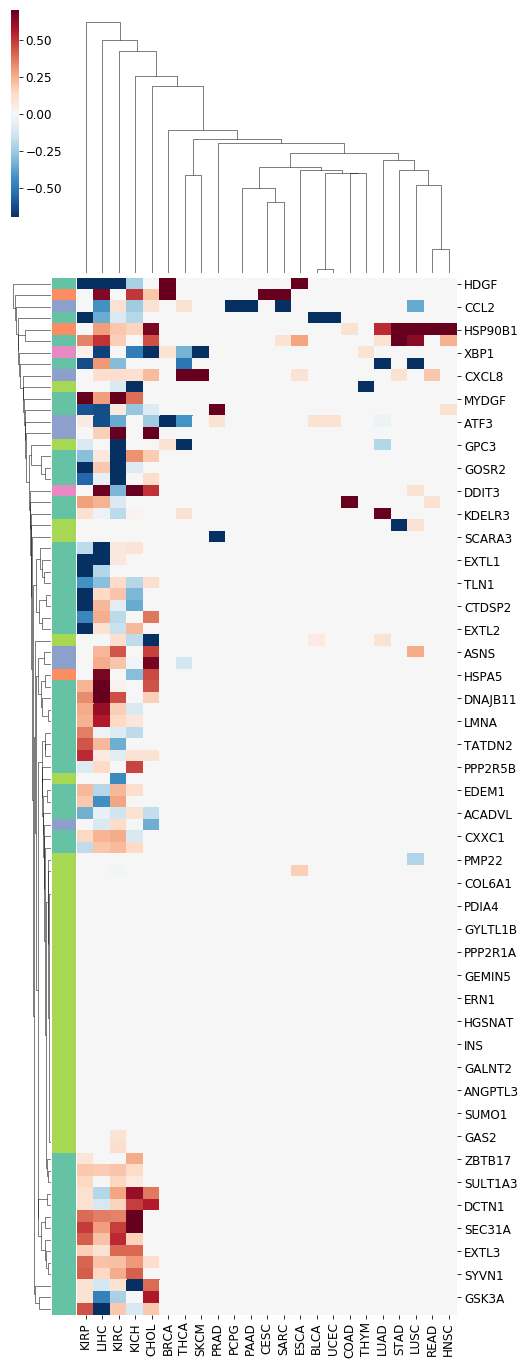

In [46]:
sns.clustermap((dfplot.fillna(0)),
               figsize = (8,24),
               center = 0,
               cmap = "RdBu_r",
               row_colors = [r_color[x] for x in dfplot.index.tolist()],
               #method = "ward",
               vmax = .7,
               vmin = -.7,
               )
#plt.savefig("/cellar/users/a53206221/Data/PQ3RO1/fig/update.6.10.2020/Lasso.coef.clustermap.pdf", bbox_inches = "tight")

# Figure S10 single cell data

In [47]:
fileDir = "/cellar/users/a53206221/Data/singlecellseq/GSE72056/GSE72056_melanoma_single_cell_revised_v2.txt"
GSE72056_Df = pd.read_csv(fileDir,sep= "\t")

GSE72056_Df = GSE72056_Df.T
GSE72056_Df.columns = [0, 1, 2] + GSE72056_Df.loc["Cell"].tolist()[3:]
ridd_Intersection = set(GSE72056_Df.columns.tolist()).intersection(RIDD_Alltargets)
GSE72056_Df_riddSubset = GSE72056_Df[ridd_Intersection].iloc[1:]

In [48]:
def getCellType(df):
    col1 = df.iloc[1:][1]
    col2 = df.iloc[1:][2]
    ansList = []
    for x,y in zip(col1,col2):
        if x == 2:
            ansList.append("Tumor")
        elif x == 1:
            if y == 1:
                ansList.append("Tcell")
            elif y == 2:
                ansList.append("Bcell")
            elif y == 3:
                ansList.append("Macrophages")
            elif y == 4:
                ansList.append("Endo")
            elif y == 5:
                ansList.append("CAF")
            elif y == 6:
                ansList.append("NK")
            else:
                ansList.append("Unknown")
        else:
            ansList.append("Unresolved")
    return ansList

cellTypeList = getCellType(GSE72056_Df)
GSE72056_Df_riddSubset["cellType"] = cellTypeList
colorMap = dict(zip(sorted(set(cellTypeList)),sns.color_palette()[:len(set(cellTypeList))]))

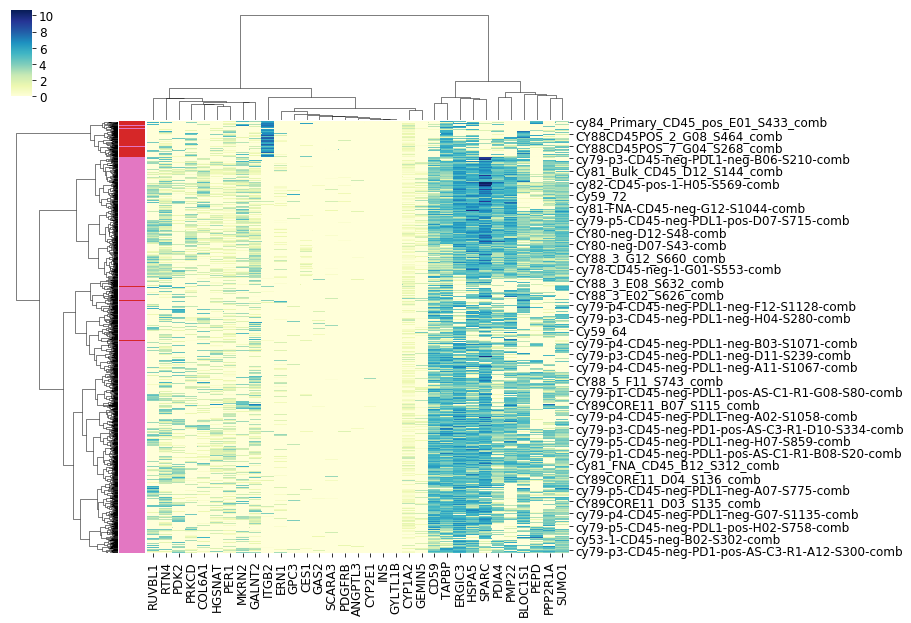

In [49]:
saveDir = "/cellar/users/a53206221/Data/PQ3RO1/fig/supplementary/single_cell_ridd_heatmap.pdf"
tmp = GSE72056_Df_riddSubset[[ True if x == "Tumor" or x == "Macrophages" else False for x in GSE72056_Df_riddSubset.cellType.tolist()]]
sns.clustermap(tmp[ridd_Intersection].fillna(0),
               cmap = "YlGnBu",
               method = "ward",
               row_colors = [ colorMap[x] for x in tmp["cellType"].tolist()])

#plt.savefig(saveDir,bbox_inches = "tight")

RanksumsResult(statistic=-10.730929438447088, pvalue=7.28596205480747e-27)

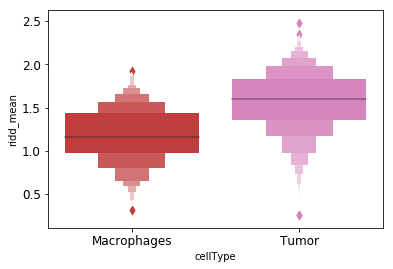

In [50]:
CMAP_CELLTYPE = [sns.color_palette()[3],
                 sns.color_palette()[6]] 

ridd_mean = []
ridd_mean.extend(GSE72056_Df_riddSubset[GSE72056_Df_riddSubset.cellType == "Macrophages"][ridd_Intersection].mean(axis = 1))
ridd_mean.extend(GSE72056_Df_riddSubset[GSE72056_Df_riddSubset.cellType == "Tumor"][ridd_Intersection].mean(axis = 1))

dfplot = pd.DataFrame({"ridd_mean":ridd_mean,
                       "cellType":["Macrophages"] * len(GSE72056_Df_riddSubset[GSE72056_Df_riddSubset.cellType == "Macrophages"]) + ["Tumor"] * len(GSE72056_Df_riddSubset[GSE72056_Df_riddSubset.cellType == "Tumor"])})


saveDir = "/cellar/users/a53206221/Data/PQ3RO1/fig/supplementary/single_cell_ridd_boxplot.pdf"
sns.boxenplot(x = "cellType", y = "ridd_mean", data = dfplot, palette=CMAP_CELLTYPE)
#plt.savefig(saveDir, bbox_inches = "tight")
sp.ranksums(dfplot[dfplot["cellType"] == "Macrophages"]["ridd_mean"],
            dfplot[dfplot["cellType"] == "Tumor"]["ridd_mean"])

RanksumsResult(statistic=-14.284613753533215, pvalue=2.729184291002938e-46)

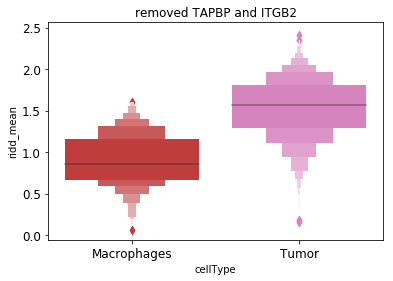

In [51]:
"""Figure S10 B, removing TAPBP and ITGB2, which do not behave like a RIDD gene"""
ridd_mean = []
ridd_Intersection_removed = ridd_Intersection.copy()
ridd_Intersection_removed.remove("TAPBP")
ridd_Intersection_removed.remove("ITGB2")
ridd_mean.extend(GSE72056_Df_riddSubset[GSE72056_Df_riddSubset.cellType == "Macrophages"][ridd_Intersection_removed].mean(axis = 1))
ridd_mean.extend(GSE72056_Df_riddSubset[GSE72056_Df_riddSubset.cellType == "Tumor"][ridd_Intersection_removed].mean(axis = 1))

plt.title("removed TAPBP and ITGB2")
dfplot = pd.DataFrame({"ridd_mean":ridd_mean,
                       "cellType":["Macrophages"] * len(GSE72056_Df_riddSubset[GSE72056_Df_riddSubset.cellType == "Macrophages"]) + ["Tumor"] * len(GSE72056_Df_riddSubset[GSE72056_Df_riddSubset.cellType == "Tumor"])})
sns.boxenplot(x = "cellType", y = "ridd_mean", palette = CMAP_CELLTYPE,
              data = dfplot)

saveDir = "/cellar/users/a53206221/Data/PQ3RO1/fig/supplementary/single_cell_ridd_removed_boxplot.pdf"
#plt.savefig(saveDir, bbox_inches = "tight")
sp.ranksums(dfplot[dfplot["cellType"] == "Macrophages"]["ridd_mean"],
            dfplot[dfplot["cellType"] == "Tumor"]["ridd_mean"])

# Figure S11

In [52]:
pathwayScore = pd.read_csv("/cellar/users/a53206221/Data/PQ3RO1/pathwayScoreDf.csv")

In [53]:
dftmp = pd.merge(tcgaDf[["patient_id","disease"]], pathwayScore, on = "patient_id").drop_duplicates()

In [54]:
diseaseList = dftmp.disease.unique().tolist()
corList = []
pvalList = []
for disease in diseaseList:
    tmp = dftmp[dftmp.disease == disease]
    test = sp.spearmanr(tmp["PERK"],
                        tmp["RIDD"])
    corList.append(test[0])
    pvalList.append(test[1])

from statsmodels.stats.multitest import multipletests
dfplot = pd.DataFrame({"disease" : diseaseList,
                       "spearmanr": corList,
                       "pval":pvalList})



/cellar/users/a53206221/anaconda3/envs/py2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/cellar/users/a53206221/anaconda3/envs/py2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/cellar/users/a53206221/anaconda3/envs/py2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/cellar/users/a53206221/anaconda3/envs/py2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/cellar/users/a53206221/anaconda3/envs/py2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [55]:
dfplot.dropna(subset = ["pval"],inplace = True)
multTest = multipletests(pvals = dfplot["pval"], method = "fdr_bh")
dfplot["sig"] = multTest[0]

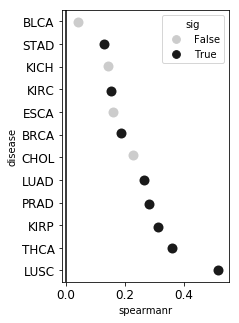

In [56]:
order = dfplot.sort_values(by = "spearmanr")["disease"].tolist()
plt.figure(figsize =(3,5))
sns.stripplot(x = "spearmanr", y = "disease", 
              data = dfplot, order = order,
              hue = "sig",
              size = 10,
              palette = CMAP_GRAY)
plt.axvline(x = 0, color = 'k')
saveDir = "/cellar/users/a53206221/Data/PQ3RO1/fig/"
#plt.savefig(saveDir + "Fig.S9.pdf",bbox_inches = "tight" )

# Table S1 Reactome gene sets

In [57]:
for genesets in dict_gene.keys():
    print "gene sets:" + genesets
    print ", ".join(dict_gene[genesets])

gene sets:PERK
ASNS, IGFBP1, DDIT3, CCL2, HERPUD1, ATF3, ATF4, CXCL8
gene sets:ATF6
DDIT3, HSP90B1, CALR, HSPA5, XBP1
gene sets:IRE1alpha
ADD1, YIF1A, TLN1, TPP1, DNAJB11, SYVN1, EXTL3, PREB, EXTL1, TATDN2, DCTN1, DNAJC3, CXXC1, GFPT1, GOSR2, EDEM1, SSR1, SERP1, PPP2R5B, WIPI1, SULT1A3, WFS1, DDX11, GSK3A, HDGF, KLHDC3, FKBP14, SRPRB, DNAJB9, TSPYL2, ZBTB17, PDIA5, CUL7, KDELR3, SEC31A, ACADVL, SHC1, PLA2G4B, EXTL2, LMNA, ARFGAP1, HYOU1, CTDSP2, PDIA6, ATP6V0D1, XBP1, MYDGF
gene sets:XBP1S
ADD1, YIF1A, TLN1, TPP1, DNAJB11, SYVN1, EXTL3, PREB, EXTL1, TATDN2, DCTN1, DNAJC3, CXXC1, GFPT1, GOSR2, EDEM1, SSR1, SERP1, PPP2R5B, WIPI1, SULT1A3, WFS1, DDX11, GSK3A, HDGF, KLHDC3, FKBP14, SRPRB, DNAJB9, TSPYL2, ZBTB17, PDIA5, CUL7, KDELR3, SEC31A, ACADVL, SHC1, PLA2G4B, EXTL2, LMNA, ARFGAP1, HYOU1, CTDSP2, PDIA6, ATP6V0D1, MYDGF


In [58]:
saveDir = "/cellar/users/a53206221/Data/PQ3RO1/"
for path in dict_gene.keys():
    pathGene = dict_gene[path]
    with open(saveDir + path + ".txt","w") as f:
        for line in pathGene:
            f.write(line + "\n")

In [59]:
dfpath = pd.DataFrame(index = range(len(dict_gene["IRE1alpha"])),columns = dict_gene.keys())
for path in dict_gene.keys():
    dfpath[path] = dict_gene[path] + [" "] * (len(dict_gene["IRE1alpha"]) - len(dict_gene[path]))

In [60]:
dfpath

,PERK,ATF6,IRE1alpha,XBP1S
0,ASNS,DDIT3,ADD1,ADD1
1,IGFBP1,HSP90B1,YIF1A,YIF1A
2,DDIT3,CALR,TLN1,TLN1
3,CCL2,HSPA5,TPP1,TPP1
4,HERPUD1,XBP1,DNAJB11,DNAJB11
5,ATF3,,SYVN1,SYVN1
6,ATF4,,EXTL3,EXTL3
7,CXCL8,,PREB,PREB
8,,,EXTL1,EXTL1
9,,,TATDN2,TATDN2


In [61]:
#dfpath.to_csv("/cellar/users/a53206221/Data/PQ3RO1/Table.S1.csv")

# Table S2 conserved gene sets

In [62]:
df_pairs = pd.read_csv("/cellar/users/a53206221/Data/PQ3RO1/difcoexpUpdate.7.6.2020/df_perturbation_pairs.csv")

In [63]:
stableList = []
for x,y,z in zip(df_pairs.level_0, df_pairs.level_1, df_pairs["count"].tolist()):
    if z == 0 and x != y:
        stableList.append([x,y])

In [64]:
significantStableList = []
corList = []
pvalList = []
df_stable_gene_pairs = pd.DataFrame()
for gene_pairs in stableList:
    test = sp.spearmanr(tcgaDf[gene_pairs[0]],
                        tcgaDf[gene_pairs[1]])
    if test[1] < 0.05:
        #print(gene_pairs)
        #print(test[0])
        significantStableList.append(gene_pairs)
        pvalList.append(test[1])
        corList.append(test[0])

multTest = multipletests(pvals= pvalList, method = "fdr_bh")
df_stable_gene_pairs = pd.DataFrame({"gene_pairs" : [x[0] + "-" + x[1] for x in significantStableList],
                                     "fdr" : multTest[1],
                                     "spearmanr" : corList})

In [65]:
stableGeneList = list(set([x.split("-")[0] for x in  df_stable_gene_pairs.gene_pairs.tolist()]))

In [66]:
len(stableGeneList)

28

In [67]:
for gene in stableGeneList:
    print(gene)

HSPA5
ARFGAP1
PREB
SEC31A
HERPUD1
SRPRB
HYOU1
EXTL3
CTDSP2
DDIT3
SHC1
EXTL1
WIPI1
DNAJB9
IGFBP1
EDEM1
PLA2G4B
LMNA
CXCL8
DDX11
GSK3A
DNAJC3
SSR1
ATF3
GOSR2
ATF4
GFPT1
PPP2R5B


In [68]:
gene1, gene2, pairs = [], [], set()
for genepairs in significantStableList:
    if genepairs[0] + "-" + genepairs[1] not in pairs and genepairs[1] + "-" + genepairs[0] not in pairs:
        pairs.add(genepairs[0] + "-" + genepairs[1])
        gene1.append(genepairs[0])
        gene2.append(genepairs[1])
df_conserved_genes_pairs = pd.DataFrame({"gene1" : gene1,
                                         "gene2" : gene2})

In [69]:
#df_conserved_genes_pairs.to_csv("/cellar/users/a53206221/Data/PQ3RO1/Table.S2.csv")

In [70]:
conserved_list = []
for i in range(len(df_conserved_genes_pairs)):
    conserved_list.append(df_conserved_genes_pairs["gene1"][i] + "-" + df_conserved_genes_pairs["gene2"][i])

In [71]:
Dir = "/cellar/users/a53206221/Data/PQ3RO1/conserved_gene_pairs.txt"
with open(Dir,"w") as f:
    for line in conserved_list:
        f.write(line + "\n")

# Table S3

In [72]:
"""see main figure"""

'see main figure'

# GO Enrichment Analysis

In [73]:
import os

In [74]:
Dir = "/cellar/users/a53206221/Data/PQ3RO1/GO_analysis_v2/"
files = os.listdir(Dir)

In [75]:
f_dict = {}
for f in files:
    f_dict[f.split("_")[1]] = pd.read_csv(Dir + f, skiprows= 11, sep = '\t')

In [76]:
f_dict.keys()

['perturbed', 'conserved', 'augmented']

In [77]:
for k in f_dict.keys():
    f_dict[k]["-log10Pval"] = -np.log10(f_dict[k]["upload_1 (FDR)"])

In [78]:
col = ["GO biological process complete","-log10Pval","hue"]
for k in f_dict.keys():
    f_dict[k]["hue"] = k
dfplot = pd.concat([f_dict["conserved"][col], f_dict["perturbed"][col]])
dfplot = pd.concat([f_dict["augmented"][col], dfplot])

In [79]:
order = dfplot.groupby(["GO biological process complete"])["-log10Pval"].median().sort_values(ascending = False).index.tolist()

In [80]:
# only parental terms
GO_PARENTAL_TERM = ['IRE1-mediated unfolded protein response',
 'PERK-mediated unfolded protein response',
 'ATF6-mediated unfolded protein response',
 'positive regulation of ER-associated ubiquitin-dependent protein catabolic process',
 'negative regulation of endoplasmic reticulum stress-induced intrinsic apoptotic signaling pathway',
 'positive regulation of transcription from RNA polymerase II promoter in response to endoplasmic reticulum stress',
 'negative regulation of endoplasmic reticulum unfolded protein response',
 'retrograde protein transport, ER to cytosol',
 'ER overload response',
 'ubiquitin-dependent ERAD pathway',
 'COPII vesicle coating',
 'response to starvation',
 'cellular response to endogenous stimulus',
 'sequestering of calcium ion',
 'protein folding in endoplasmic reticulum',
 'protein maturation by protein folding',
 'regulation of translational initiation in response to stress',
 'retrograde protein transport, ER to cytosol',
 'endoplasmic reticulum to Golgi vesicle-mediated transport',
 'cellular response to oxygen-containing compound',
 'cellular protein modification process',
 'cellular response to organonitrogen compound',
 'cellular response to organic cyclic compound',
 'maintenance of protein localization in endoplasmic reticulum',
 'regulation of endoplasmic reticulum stress-induced intrinsic apoptotic signaling pathway',
 'positive regulation of neuron apoptotic process',
 'cellular response to metal ion',
 'negative regulation of neuron death',
 'negative regulation of cell cycle',
 'negative regulation of apoptotic process',
 'cellular response to oxygen-containing compound',
 'regulation of protein modification process',
 'cellular protein modification process',
 'positive regulation of ER-associated ubiquitin-dependent protein catabolic process',
 'endoplasmic reticulum calcium ion homeostasis',
 'ERAD pathway',
 'cellular response to insulin stimulus',
 'ubiquitin-dependent protein catabolic process']

In [81]:
index_term = [x.split("(")[0][:-1] for x in dfplot["GO biological process complete"].tolist()]

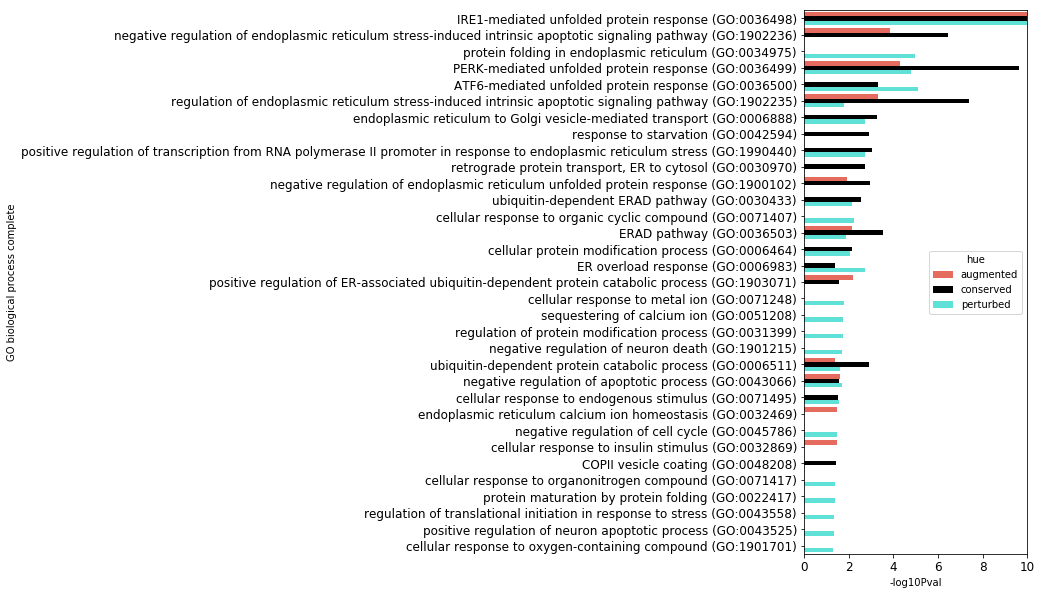

In [82]:
dftmp = dfplot[[x in GO_PARENTAL_TERM for x in index_term]]
order = dftmp.groupby(["GO biological process complete"])["-log10Pval"].median().sort_values(ascending = False).index.tolist()
plt.figure(figsize = (4,10))
sns.barplot( y = "GO biological process complete",
             x = "-log10Pval",
             hue = "hue",
            data = dftmp,
            palette = {"augmented":"#FB5946", "conserved":"k", "perturbed":"#49F7E9"},
            order = order)
plt.xlim([0,10])
saveDir = figDir + "go.parental.pdf"
#plt.savefig(saveDir, bbox_inches = "tight")

In [83]:
#dfplot.to_csv("/cellar/users/a53206221/Data/PQ3RO1/go_analysis.csv")